/tmp/ipykernel_1673517/1959325031.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot(raw_ifs, labels=levels, showmeans=False)
/tmp/ipykernel_1673517/1959325031.py:58: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(dgs, labels=levels, showmeans=False)
/tmp/ipykernel_1673517/1959325031.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot(plddts, labels=levels, showmeans=False)


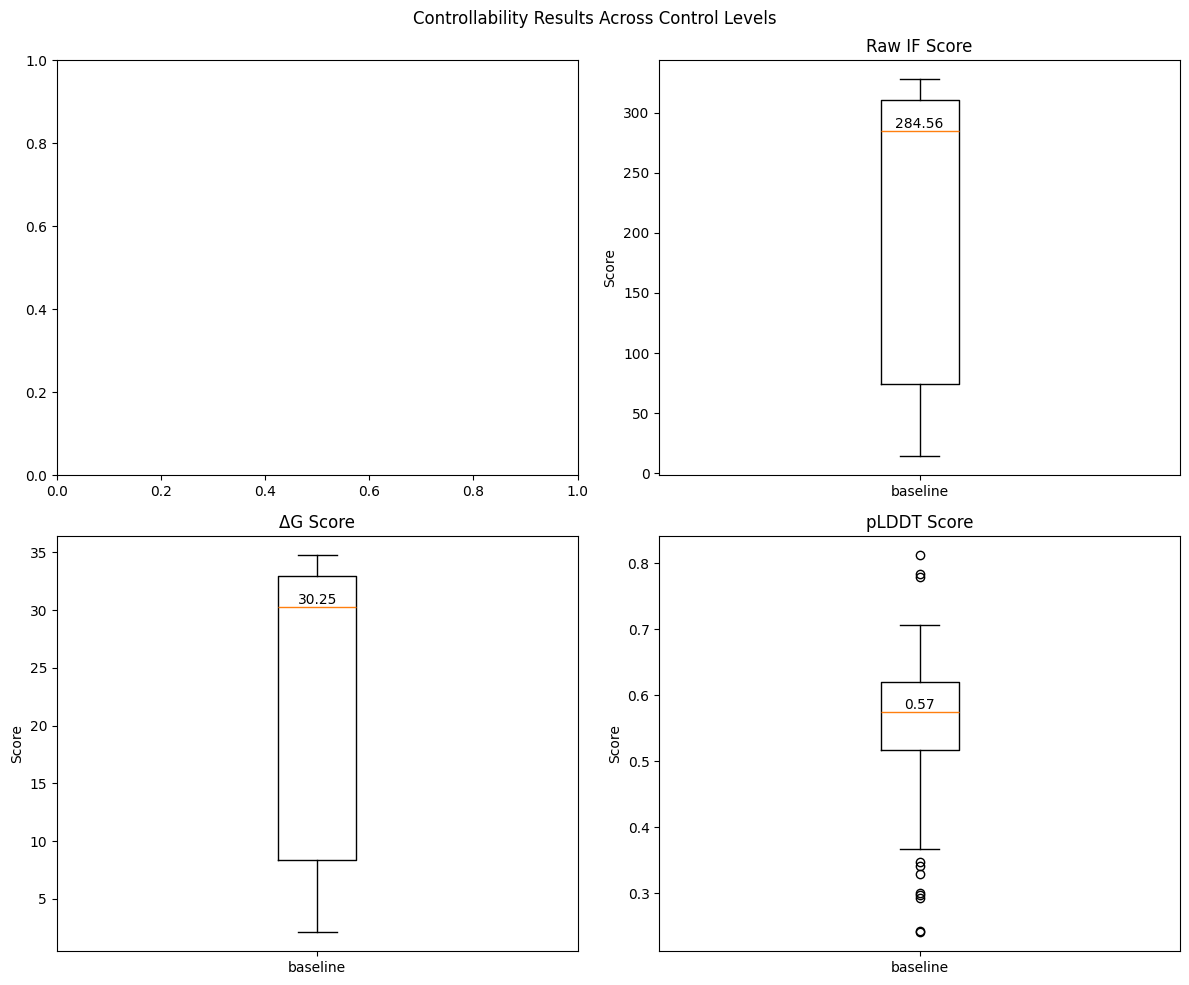

In [22]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load results
# Define paths to different result files
result_paths = {
    'baseline_no_tags': 'DPO_ZymCTRL/results/zymctrl_baseline_no_tags/controllability_results.json',
    'baseline_with_tags': 'DPO_ZymCTRL/results/zymctrl_baseline_with_tags/controllability_results.json', 
    'brenda_sft': 'DPO_ZymCTRL/results/brenda_sft_only_high_stability_ablation/controllability_results.json',
    'talal_dpo': 'DPO_ZymCTRL/results/talal_dpo_sft_only_high_stability_ablation/controllability_results.json',
    'talal_dpo_epoch0': 'DPO_ZymCTRL/results/talal_dpo_sft_only_high_stability_ablation_epoch0/controllability_results.json',
    'epoch4_sft_dpo': 'DPO_ZymCTRL/results/epoch4-sft-dpo/controllability_results.json',
    'sft_dpo_epoch0': 'DPO_ZymCTRL/results/sft-dpo-epoch0-old/controllability_results.json',
    'sft_dpo_epoch1': 'DPO_ZymCTRL/results/sft-dpo-epoch1/controllability_results.json',
    'talal_dpo_2': "DPO_ZymCTRL/results/talal-dpo-2/controllability_results.json",
    'talal_dpo_3': "DPO_ZymCTRL/results/talal-dpo-3/controllability_results.json"
}

# Select which results to analyze (can easily change this)
selected_results = 'talal_dpo_3'

# Load the selected results
with open(result_paths[selected_results], 'r') as f:
    results = json.load(f)

# Extract metrics for each control level
# levels = ['low', 'medium', 'high']
levels = ['baseline']
perplexities = []
raw_ifs = []
dgs = []
plddts = []

for level in levels:
    perplexities.append(results[level]['metrics']['perplexity'])
    raw_ifs.append(results[level]['metrics']['stability']['raw_if'])
    dgs.append(results[level]['metrics']['stability']['dg'])
    plddts.append(results[level]['metrics']['stability']['plddt'])

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Controllability Results Across Control Levels')

# Function to add median labels
def add_median_labels(ax, data):
    medians = [np.median(d) for d in data]
    for i, median in enumerate(medians):
        ax.text(i + 1, median, f'{median:.2f}', ha='center', va='bottom')

# Plot raw IF 
axes[0,1].boxplot(raw_ifs, labels=levels, showmeans=False)
axes[0,1].set_title('Raw IF Score')
axes[0,1].set_ylabel('Score')
add_median_labels(axes[0,1], raw_ifs)

# Plot dG
axes[1,0].boxplot(dgs, labels=levels, showmeans=False)
axes[1,0].set_title('ΔG Score')
axes[1,0].set_ylabel('Score')
add_median_labels(axes[1,0], dgs)

# Plot pLDDT
axes[1,1].boxplot(plddts, labels=levels, showmeans=False)
axes[1,1].set_title('pLDDT Score')
axes[1,1].set_ylabel('Score')
add_median_labels(axes[1,1], plddts)

plt.tight_layout()
plt.show()


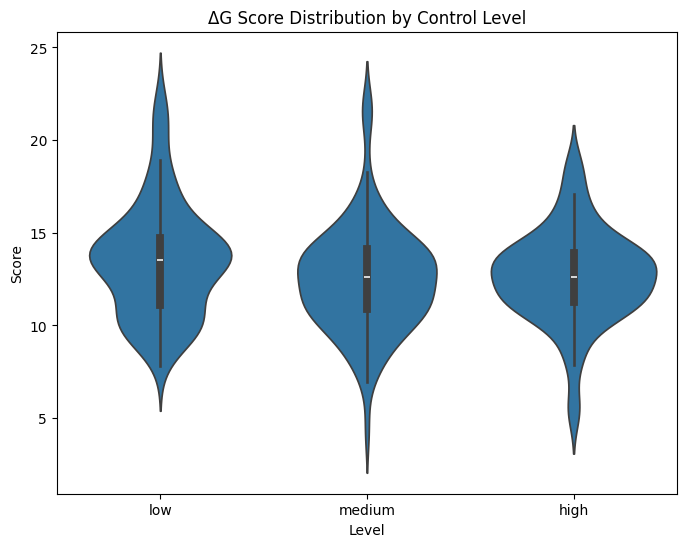

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for seaborn
import pandas as pd
df = pd.DataFrame({
    'Score': sum(dgs, []),
    'Level': sum([[level]*len(dgs[i]) for i, level in enumerate(levels)], [])
})

plt.figure(figsize=(8, 6))
sns.violinplot(x='Level', y='Score', data=df, inner='box')
plt.title('ΔG Score Distribution by Control Level')
plt.show()

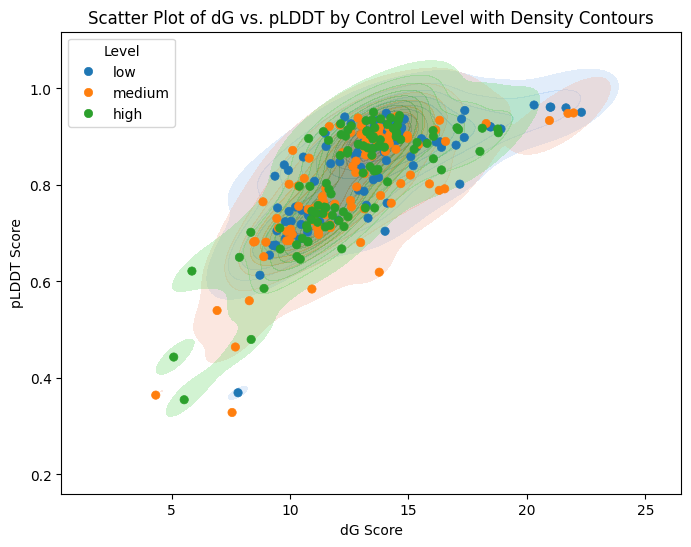

In [6]:
# Create a DataFrame for the scatter plot
scatter_data = pd.DataFrame({
    'dG': [value for sublist in dgs for value in sublist],  # Flatten the list of dG scores
    'pLDDT': [value for sublist in plddts for value in sublist],  # Flatten the list of pLDDT scores
    'Level': [level for i, level in enumerate(levels) for _ in range(len(dgs[i]))]  # Repeat each level for the length of its corresponding dG list
})

# Plot the scatter plot with density contours
plt.figure(figsize=(8, 6))
sns.kdeplot(data=scatter_data, x='dG', y='pLDDT', hue='Level', fill=True, alpha=0.3)
sns.scatterplot(x='dG', y='pLDDT', hue='Level', data=scatter_data, edgecolor=None)
plt.title('Scatter Plot of dG vs. pLDDT by Control Level with Density Contours')
plt.xlabel('dG Score')
plt.ylabel('pLDDT Score')
plt.show()

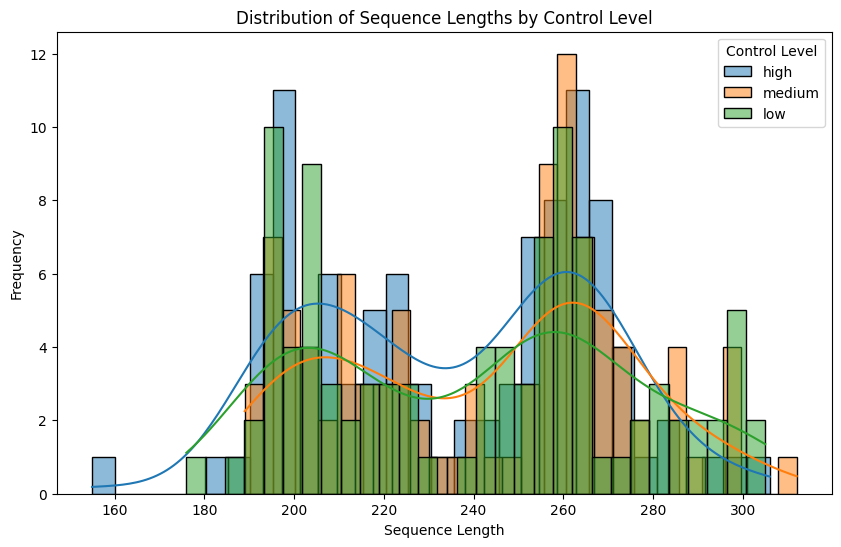

In [17]:
import json
import matplotlib.pyplot as plt

# Load the controllability results
with open('DPO_ZymCTRL/brenda_results_epoch4/controllability_results.json', 'r') as f:
    results = json.load(f)

# Extract sequence lengths for each control level
sequence_lengths = {
    'high': [len(seq) for seq in results['high']['sequences']],
    'medium': [len(seq) for seq in results['medium']['sequences']],
    'low': [len(seq) for seq in results['low']['sequences']]
}

# Plot the distribution of sequence lengths
plt.figure(figsize=(10, 6))
for level, lengths in sequence_lengths.items():
    sns.histplot(lengths, label=level, kde=True, bins=30, alpha=0.5)

plt.title('Distribution of Sequence Lengths by Control Level')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.legend(title='Control Level')
plt.show()
